## Traffic on I-94 Interstate Highway
In this project we're going to look at [data](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) about westbound traffic on the I-94 Interstate highway. The goal of this project is to determine some indicators of heavy traffic.

In [1]:
import pandas as pd
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print(data.head())
print(data.tail())
print(data.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

A station located approximately midway between Minneapolis and Saint Paul recored the traffic data ([see documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)). According to the dataset information the station only records westbound traffic information, so we should keep that in mind when looking at this data and not make generalizations for all of the traffic on the I-94 interstate highway.

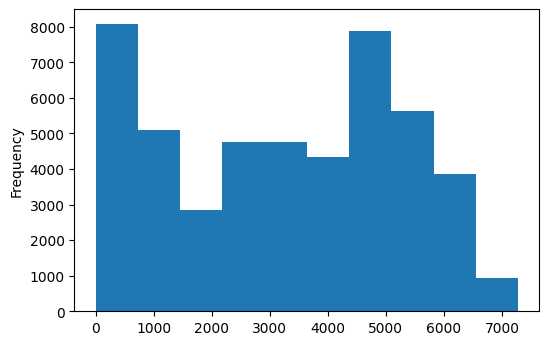

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
data["traffic_volume"].plot.hist()
plt.show()

In [4]:
data["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can see that the hourly traffic ranged from 0 to 7,280 cars with an average of 3,260 cars on the highway. About 25% of the time there were around 1,193 cars or fewer passing the station each hour. And about 75% of the time the traffic volume was 4 times as much at 4,933 cars or more. One factor we can look at is the time of day to see if there is a correlation between traffic during the day and traffic during the night on the highway.

In [28]:
data["date_time"] = pd.to_datetime(data["date_time"])
day_bool = (data["date_time"].dt.hour >= 7) & (data["date_time"].dt.hour < 19)
night_bool = (data["date_time"].dt.hour >= 19) | (data["date_time"].dt.hour < 7)
day = data.copy()[day_bool]
night = data.copy()[night_bool]
print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


We divided the dataset into two parts. Daytime data and nighttime data.

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


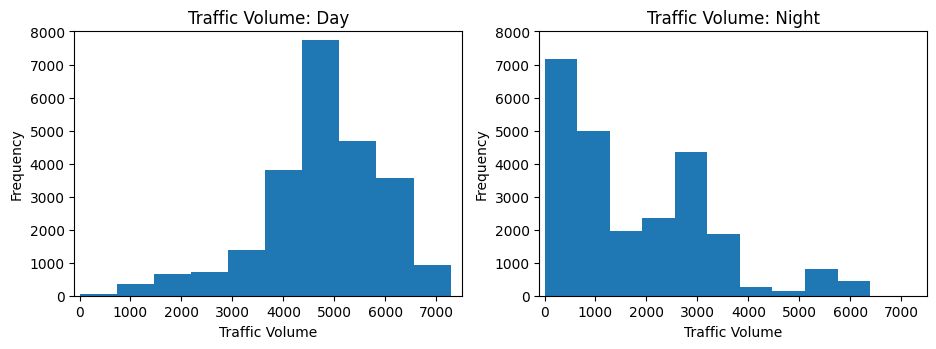

In [29]:
plt.figure(figsize=(11, 3.5))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume: Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim(0, 8000)
plt.xlim(-100, 7500)

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume: Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim(0, 8000)
plt.xlim(-100, 7500)

plt.show

print(day["traffic_volume"].describe())
print(night["traffic_volume"].describe())

Looking at the graphs above we can see that the graph for the daytime traffic is left-skewed and that the graph for the nighttime traffic is right-skewed. The graphs tell us that on average there seems to be more traffic during the day than during the night. During the day there's an average of 4,762 cars on the highway whereas during the night there is an average of 1,785 cars.

Since we want to find indicators of heavy traffic we're going to disregard the nighttime data since traffic seems to be light during the night. 

One indicator of heavy traffic could be the time. For example, the time of day, day of the week, and the month could all be indicators on heavy traffic, so we're going to look at line graphs for each.

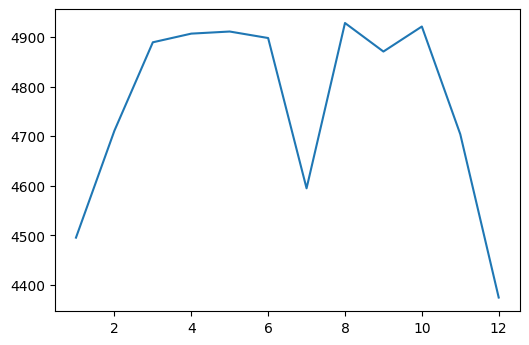

In [37]:
day["month"] = day["date_time"].dt.month
by_month = day.groupby("month").mean()
plt.plot(by_month["traffic_volume"])
plt.show()

According to the graph, traffic seems to be light during the colder months and higher during the warmer months. There is one exception to this and that is the month of July. 

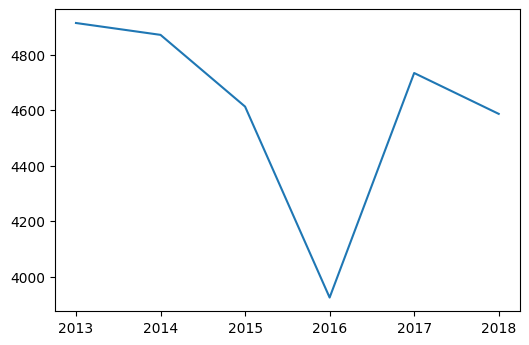

In [39]:
day["year"] = day["date_time"].dt.year
july = day[day["month"] == 7]
by_july = july.groupby("year").mean()
plt.plot(by_july["traffic_volume"])
plt.show()

We can see that every year during the month of July there is a large amount of traffic except the during 2016. There could be a specific reason for this such as road construction. So our earlier conclusion that traffic is heavier during the warm months still stands.

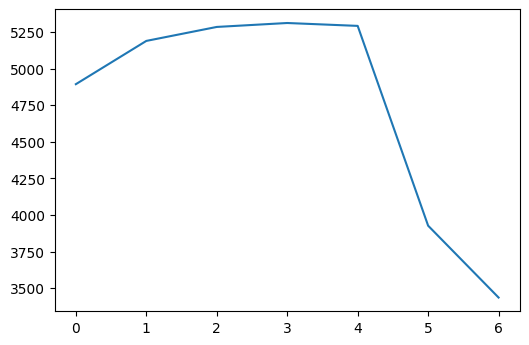

In [38]:
day["dayofweek"] = day["date_time"].dt.dayofweek
by_dayofweek = day.groupby("dayofweek").mean()
plt.plot(by_dayofweek["traffic_volume"])
plt.show()

According to the graph above we can see that traffic is heavy during business days and lighter during the weekends. We can see that traffic is the highest on Friday and then dips down significantly on Saturday.

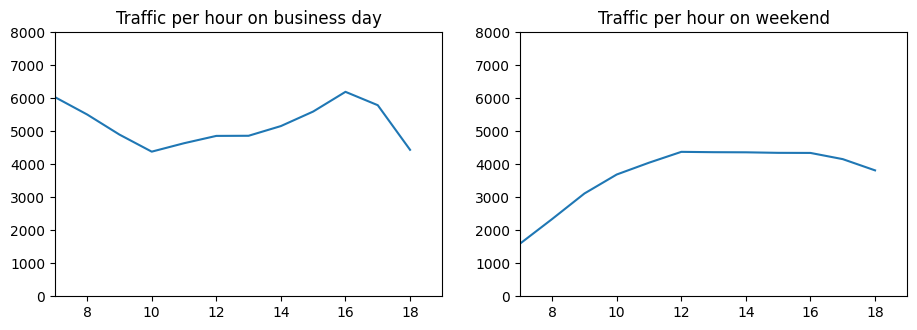

In [46]:
day["hour"] = day["date_time"].dt.hour
business_days = day.copy()[day["dayofweek"] <= 4] # 4 == friday
weekend = day.copy()[day["dayofweek"] >= 5] # 5 == saturday
by_hour_business = business_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

plt.figure(figsize=(11, 3.5))
plt.subplot(1,2,1)
plt.plot(by_hour_business["traffic_volume"])
plt.title("Traffic per hour on business day")
plt.xlim((7, 19))
plt.ylim((0, 8000))

plt.subplot(1,2,2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.title("Traffic per hour on weekend")
plt.xlim((7, 19))
plt.ylim((0, 8000))

plt.show()

Looking at the graphs above we can see that during the business days, traffic peaks around 7am with about 6,000 cars on the highway and then around 10am traffic cools down and then peaks again around 5pm with about 6,000 cars. The reason for this could be people commuting to and from work. During the weekend the early parts of the day don't seem to have a lot of traffic but as the hour increases so does the traffic until about 12pm where it seems constant.

After looking at time and how it can be a factor for heavy traffic we can also look at the weather and see if it affects heavy traffic or not.

In [51]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
year             -0.003557
hour              0.172704
Name: traffic_volume, dtype: float64

Temp shows the strongest correlation at about +0.13. The other relevant columns `rain_1h`, `snow_1h`, `clouds_all` don't show strong correlation with `traffic volume`.

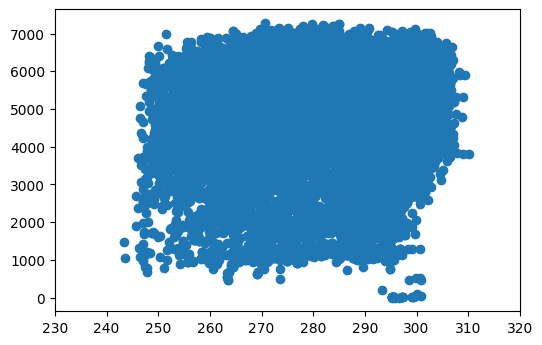

In [54]:
plt.scatter(x=day["temp"], y=day["traffic_volume"])
plt.xlim((230, 320))
plt.show()

Based on the graph above we can conclude that temperature is not a good indicator of heavy traffic.

We'll now look at two more weather-related columns: `weather_main` and `weather_description`.

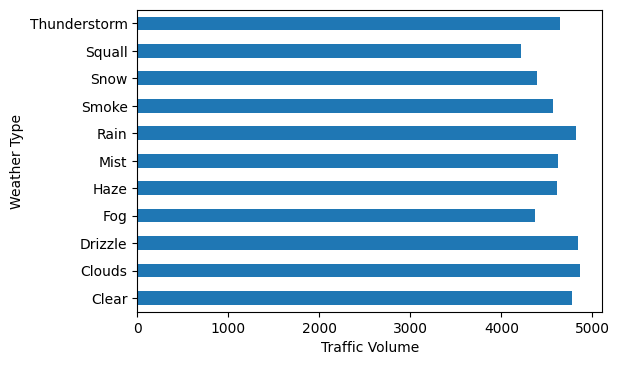

In [60]:
by_weather_main = day.groupby("weather_main").mean()
by_weather_desc = day.groupby("weather_description").mean()
by_weather_main["traffic_volume"].plot.barh()
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Type")
plt.show()

It looks like there is no weather type that exceeds 5,000 cars.

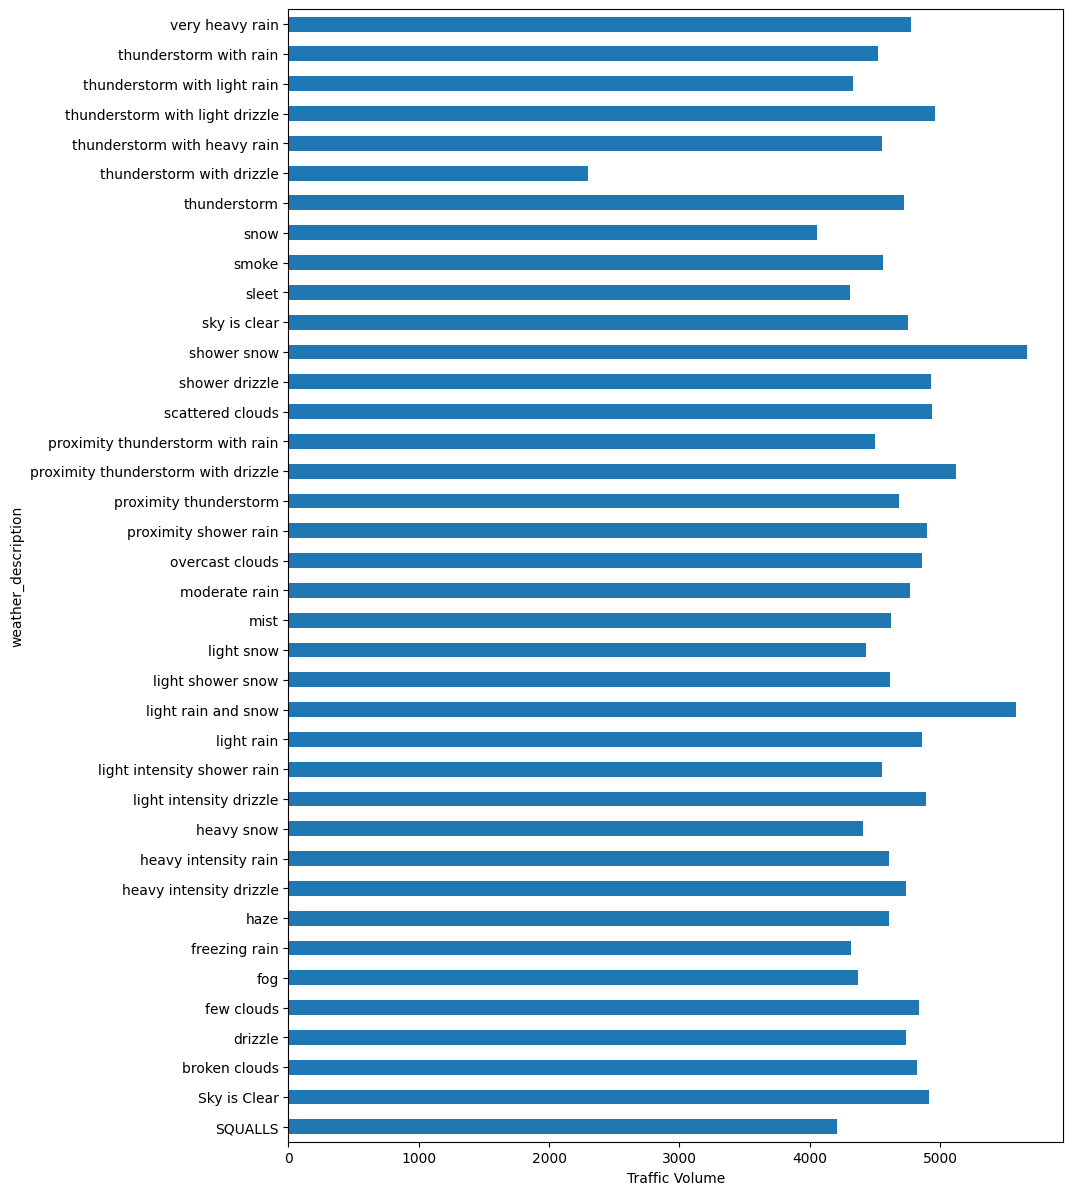

In [63]:
plt.figure(figsize=(10, 15))
by_weather_desc["traffic_volume"].plot.barh()
plt.xlabel("Traffic Volume")
plt.show()

We can see that `shower snow`, `light rain and snow`, and `proximity thunderstorm with drizzle` both exceed 5,000 cars. There is no clear indicator why these weather types have the highest average traffic volume. These weather types are bad, but not as bad as some of the other recorded weather types in the dataset.

## Conclusion
Our goal for this project was to determine indicators for heavy traffic on the I-94 highway. After going through our analysis we found two indicators of heavy traffic, time and weather. Heavy traffic occurs the most during the `daytime` on `business days` (Monday-Friday). Heavy traffic usually occurs during the `warm months` (March-October). We also found out that heavy traffic occurs during `shower snow`, `light rain and snow`, and `proximity thunderstorm with drizzle`.